In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

/home/aleruzza/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


cp: 'results/gasisostockavv//summary0.dat' and 'results//gasisostockavv/summary0.dat' are the same file
cp: -r not specified; omitting directory 'results/gasisostockavv/'


256

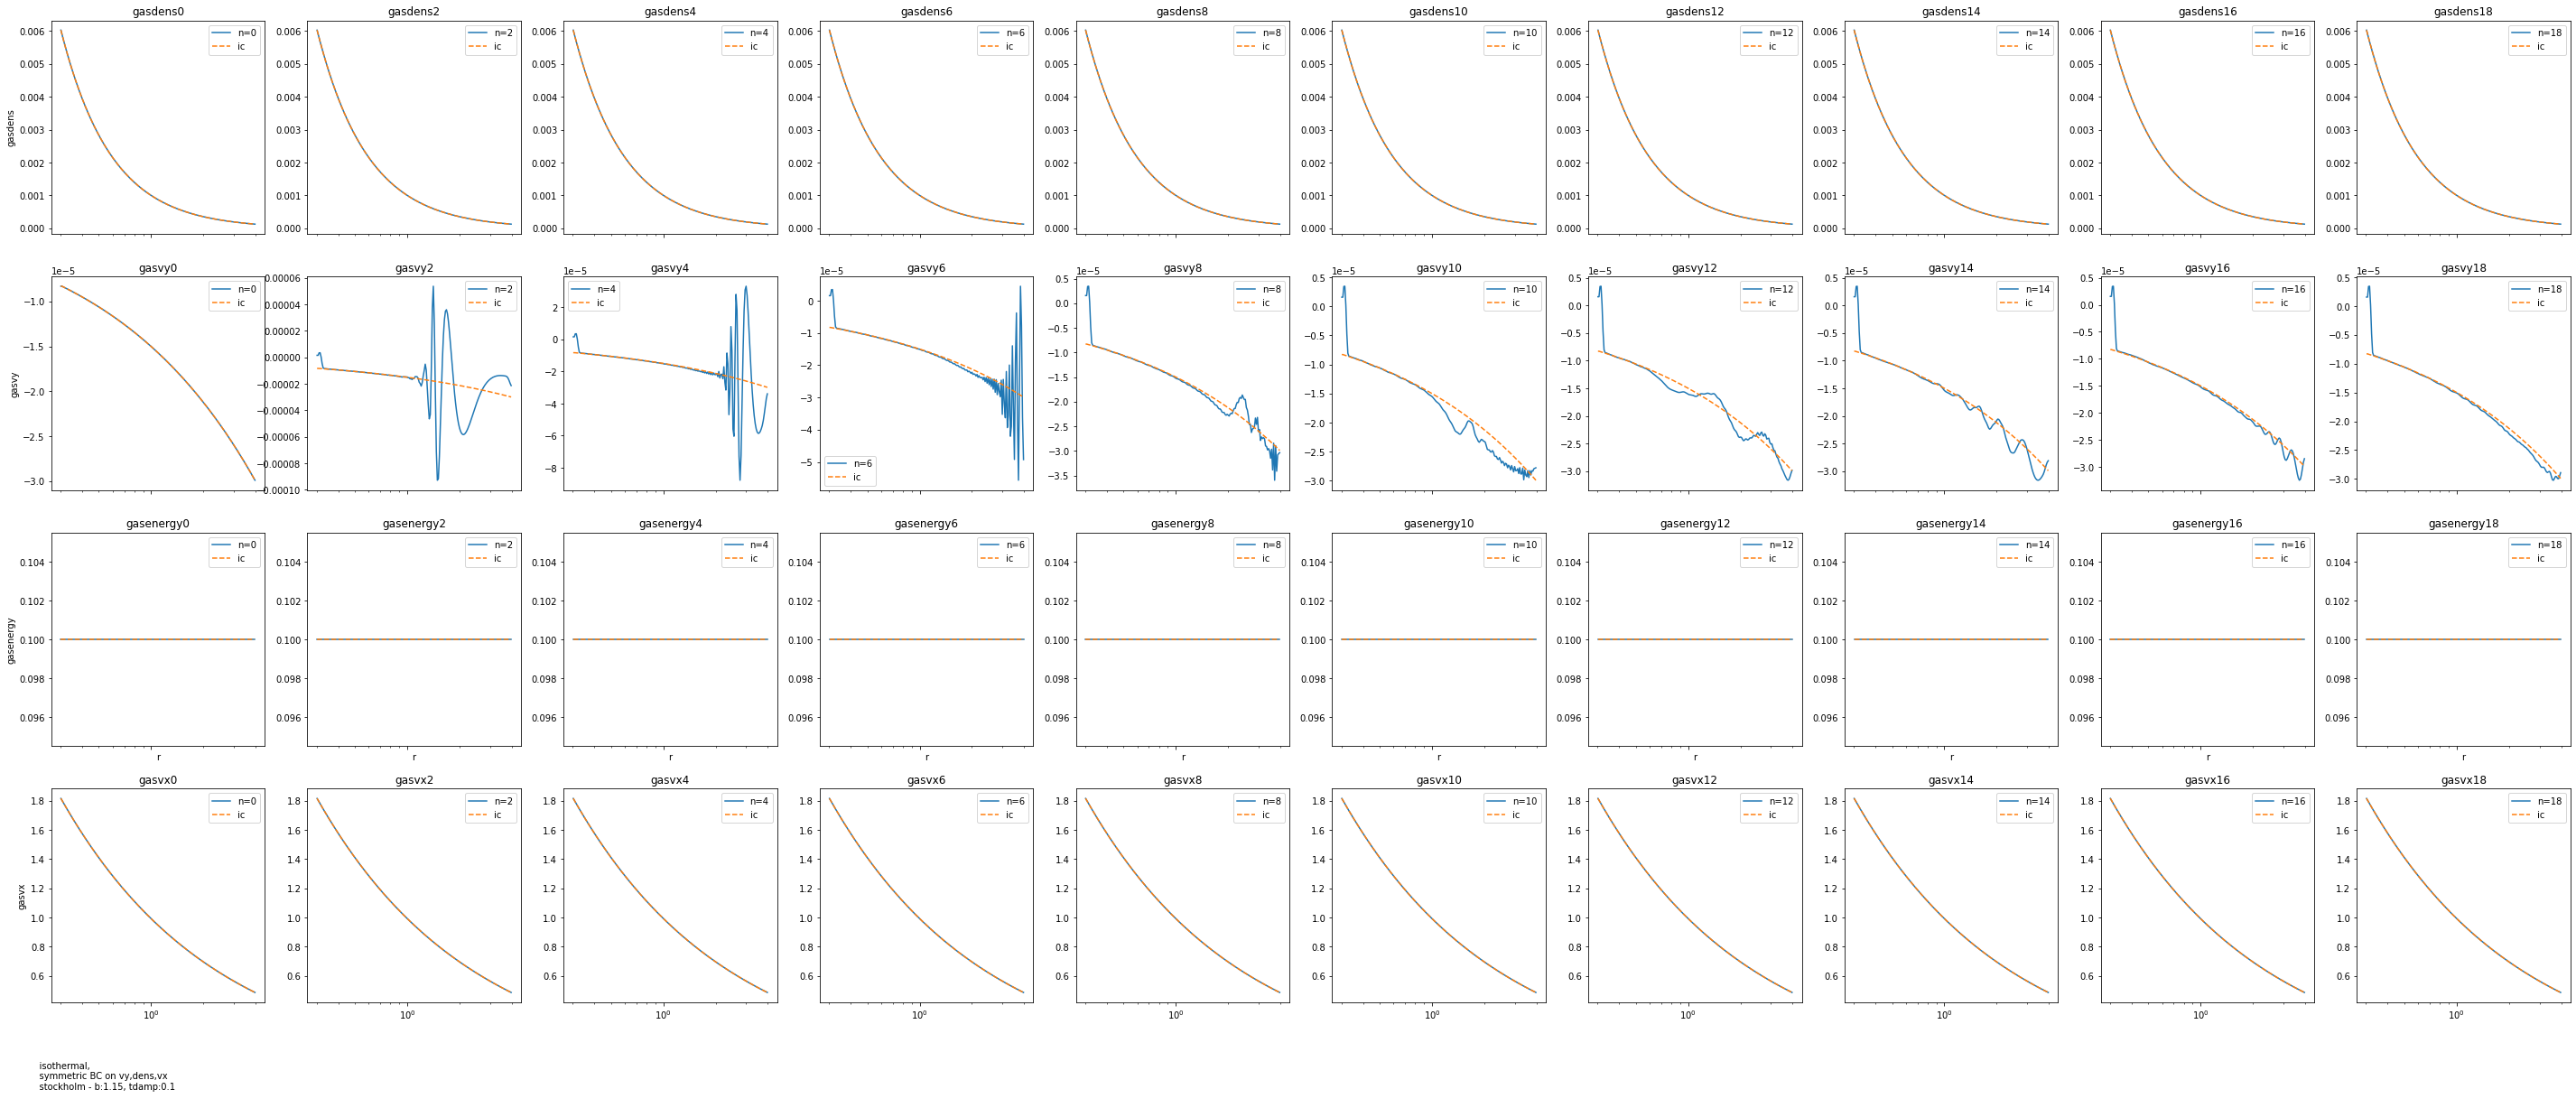

In [3]:
id = 'gasisostockavv'
resultsfold = 'results/'
datafold = 'results/gasisostockavv/'
n = 20
step = 2
types=['gasdens', 'gasvy', 'gasenergy', 'gasvx']
nr = 193
ntheta = 600

fig, axs = plt.subplots(len(types), int(n/step), figsize=(n*5/step, len(types)*5), sharex=True)
r = np.logspace(np.log10(0.3), np.log10(4), 194)
r = 0.5*(r[0:-1]+r[1:])
comment = '''
    isothermal,
    symmetric BC on vy,dens,vx
    stockholm - b:1.15, tdamp:0.1
'''

#os.mkdir(f'{resultsfold}/{id}')
os.system(f'cp {datafold}/summary0.dat {resultsfold}/{id}/summary0.dat')
os.system(f'cp setups/betacooltest/betacooltest.bound.0 {resultsfold}/{id}/bound')

for i, ii in enumerate(range(0, n, step)):
    axs[2,i].set_xlabel('r')
    for j, type in enumerate(types):
        data = np.fromfile(f'{datafold}/{type}{ii}.dat').reshape(nr, ntheta).mean(axis=1)
        data0 = np.fromfile(f'{datafold}/{type}{0}.dat').reshape(nr, ntheta).mean(axis=1)
        axs[j,i].plot(r, data, label=f'n={ii}')
        axs[j,i].plot(r, data0,'--', label='ic')
        axs[j,i].set_title(f'{type}{ii}')
        axs[j,0].set_ylabel(f'{type}')
        axs[j,i].legend()
        #axs[j,i].set_yscale('log')
        axs[j,i].set_xscale('log')
plt.figtext(0.118, 0.05,comment)
plt.savefig(f'{resultsfold}/{id}/{id}.pdf', bbox_inches='tight', dpi=500)
os.system(f'cp {datafold} {resultsfold}/{id}')

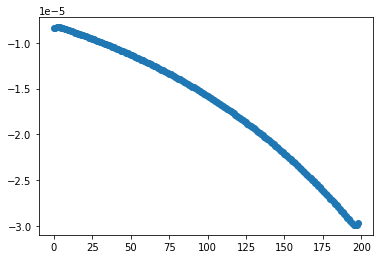

In [147]:
dens = np.fromfile('results/onlygasisostockanti/gasvy0_2d.dat').reshape(199)
plt.scatter(range(len(dens)),dens)

In [148]:
dens

array([-8.41118136e-06, -8.35492678e-06, -8.29904843e-06, -8.29904843e-06,
       -8.29904843e-06, -8.35492678e-06, -8.41118136e-06, -8.46781471e-06,
       -8.52482938e-06, -8.58222793e-06, -8.64001295e-06, -8.69818705e-06,
       -8.75675284e-06, -8.81571295e-06, -8.87507005e-06, -8.93482681e-06,
       -8.99498592e-06, -9.05555009e-06, -9.11652203e-06, -9.17790451e-06,
       -9.23970029e-06, -9.30191214e-06, -9.36454287e-06, -9.42759530e-06,
       -9.49107227e-06, -9.55497664e-06, -9.61931128e-06, -9.68407909e-06,
       -9.74928299e-06, -9.81492591e-06, -9.88101082e-06, -9.94754068e-06,
       -1.00145185e-05, -1.00819473e-05, -1.01498301e-05, -1.02181699e-05,
       -1.02869699e-05, -1.03562331e-05, -1.04259627e-05, -1.04961618e-05,
       -1.05668335e-05, -1.06379811e-05, -1.07096077e-05, -1.07817166e-05,
       -1.08543110e-05, -1.09273942e-05, -1.10009695e-05, -1.10750401e-05,
       -1.11496095e-05, -1.12246810e-05, -1.13002579e-05, -1.13763437e-05,
       -1.14529418e-05, -

In [115]:
#trying to reproduce the initial coditions of vx
st = 'dens'
r = np.logspace(np.log10(0.3), np.log10(4), 194)
r = 0.5*(r[0:-1]+r[1:])
q = np.fromfile(f'results/onlygas/gas{st}13.dat').reshape(193,600)
plt.plot(r, q.mean(axis=1))
#plt.plot(r, r**-0.5)
plt.plot(r, -1.5*1e-3*0.1*0.1*r**(0.5))
plt.ylabel(st, size=16)
plt.xlabel('r', size=16)
plt.gcf().set_size_inches(15,10)

FileNotFoundError: [Errno 2] No such file or directory: 'results/onlygas/gasdens13.dat'

In [117]:
#trying to reproduce the initial coditions of vx
st = 'dens'
r = np.logspace(np.log10(0.3), np.log10(4), 194)
r = 0.5*(r[0:-1]+r[1:])
q = np.fromfile(f'results//gas{st}100.dat').reshape(193,600)
plt.plot(r, q.mean(axis=1))
plt.plot(r, (1+0.01*r*(-1))**0.5)
#plt.plot(r, r**-0.5)
#plt.plot(r, -5*1e-3*0.1*0.1*r**(0.5))
plt.ylabel(st, size=16)
plt.xlabel('r', size=16)
plt.gcf().set_size_inches(15,10)

FileNotFoundError: [Errno 2] No such file or directory: 'results/onlygas/gasdens100.dat'

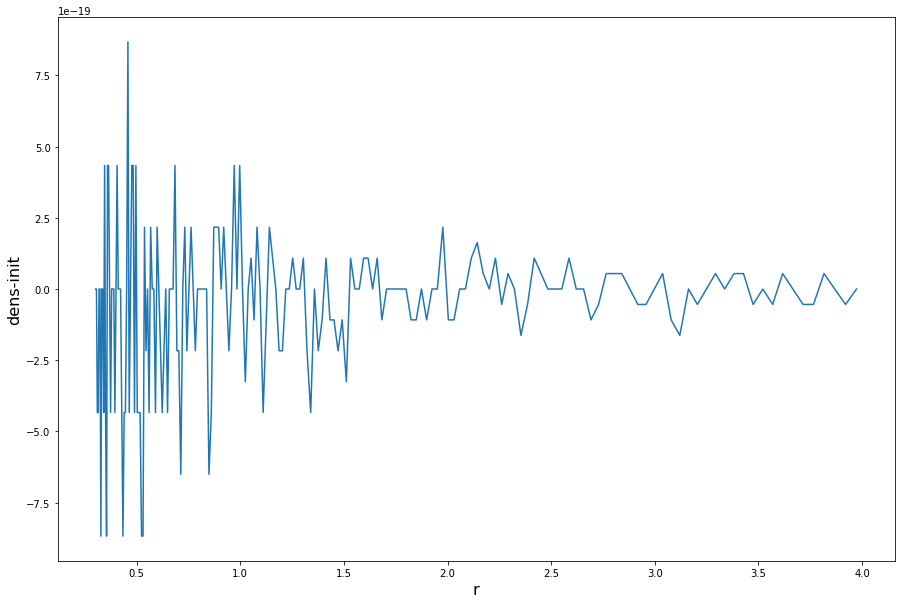

In [85]:
#trying to reproduce the initial coditions of vx
st = 'dens'
r = np.logspace(np.log10(0.3), np.log10(4), 194)
r = 0.5*(r[0:-1]+r[1:])
q = np.fromfile(f'results/onlygas/gas{st}0.dat').reshape(193,600)
plt.plot(r, q.mean(axis=1)-(1e-3*r**-1))
#plt.plot(r, 1e-3*r**-1)

plt.ylabel(f'{st}-init', size=16)
plt.xlabel('r', size=16)
plt.gcf().set_size_inches(15,10)

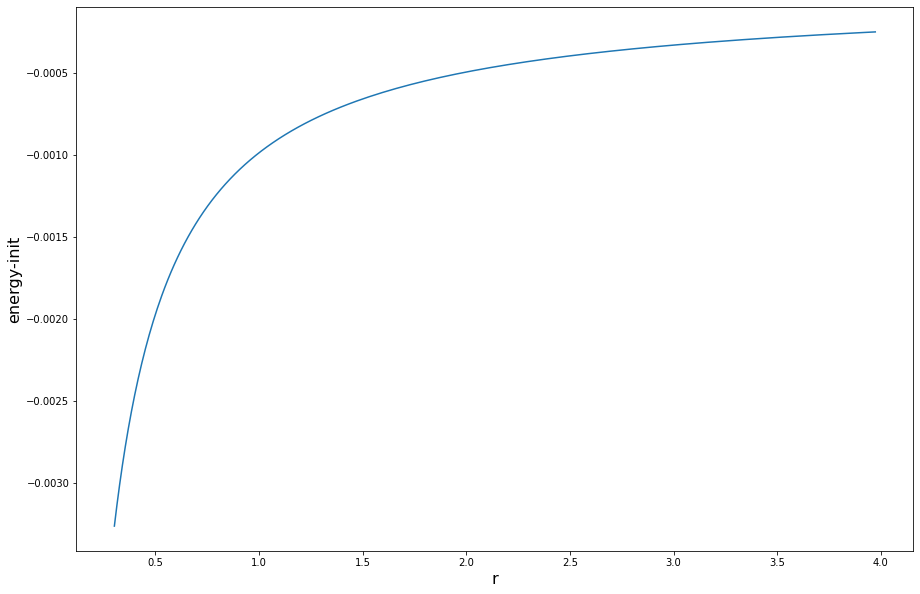

In [101]:
#trying to reproduce the initial coditions of vx
st = 'energy'
r = np.logspace(np.log10(0.3), np.log10(4), 194)
r = 0.5*(r[0:-1]+r[1:])
q = np.fromfile(f'results/onlygas/gas{st}0.dat').reshape(193,600)
plt.plot(r, q.mean(axis=1)-(1e-))
#plt.plot(r, 1e-3*r**-1)

plt.ylabel(f'{st}-init', size=16)
plt.xlabel('r', size=16)
plt.gcf().set_size_inches(15,10)

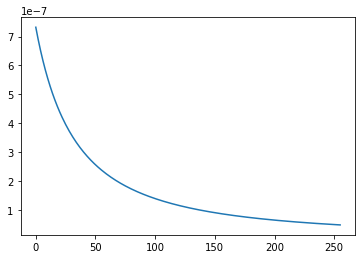

In [228]:
e = (e+dt*beta * e0)/(1.0 + beta*dt);
plt.plot(e)

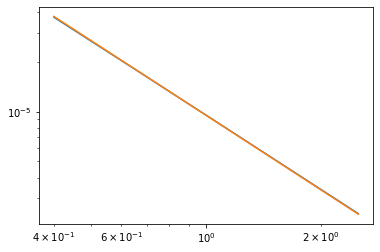

In [232]:
r = np.linspace(0.4, 2.5, 256)
plt.plot(r,e0)
plt.plot(r, e0[73]*(r**-1.5))
plt.yscale('log')

plt.xscale('log')


In [231]:
np.argmin(np.abs(r-1))

73